In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes-dataset/diabetes2.csv


 Veri setinin boyutu :  (768, 9)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Confusion Matrix : 
 [[90  9]
 [25 30]]
 True Positive (TP) Değeri :  90
 False Positive (FP) Değeri :  9
 True Negative (TN) Değeri :  25
 False Negative (FN) Değeri :  30
 Accuracy :  0.7792207792207793
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahmin Değeri :  [0]
 Gerçek Değeri :  [0]  Tahm

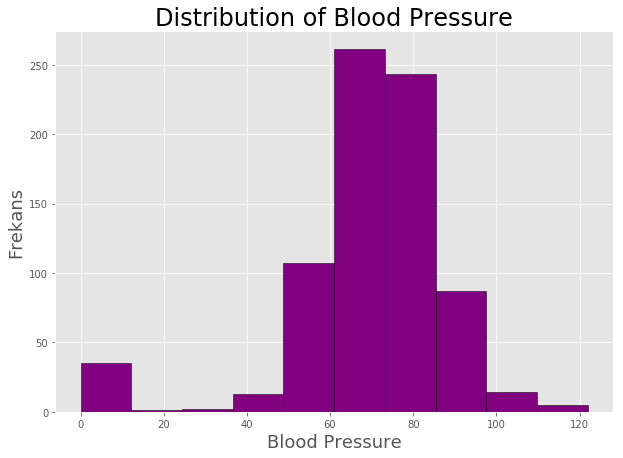

In [2]:
# Kütüphaneleri tanımlıyoruz
import pandas as pd

# Dataset imizi okuyoruz
data = pd.read_csv("../input/diabetes-dataset/diabetes2.csv")
print(" Veri setinin boyutu : ",data.shape)

# Kan Basıncı için Histogram Grafiği
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# BloodPressure için Histogram
data.BloodPressure.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Blood Pressure', size=24)
plt.xlabel('Blood Pressure', size=18)
plt.ylabel('Frekans', size=18)

X = pd.DataFrame(data.iloc[:,:-1]) # Outcome sütunu hariç diğer sütunları dataframe e dönüştürüp X değişkeninie atıyoruz
Y = pd.DataFrame(data.iloc[:,-1])  # Outcome sütununu dataframe e dönüştürüp y değişkeninie atıyoruz
# print(X)
# print(Y)

# Veri Kümesi Ayırma
from sklearn.model_selection import train_test_split # Veri kümesini train ve test verisi olarak bölüyoruz. Bunun için kütüphane tanımlaması yapıyoruz
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1) # Tarin verisi % 20 Test verisi % 80 

# Tahmin Yapma
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # LogisticRegression sınıfından bir nesne oluşturuyoruz
lr.fit(x_train,y_train) # Veri kümemiz ile makinemizi eğitiyoruz
y_pred = lr.predict(x_test) # Tahmin yapıyoruz

# Confusion matrix Oluşturma
from sklearn.metrics import confusion_matrix # Confusion matrix için kütüphane tanımlıyoruz
cm = confusion_matrix(y_test,y_pred) # Confusion matrix i y_test ve y_pred değerleri ile oluşturuyoruz
print(" Confusion Matrix : ")
print("",cm) # Confusion matrix i ekrana yazdırıyoruz

# TP, NP, FN ve TN Hesaplama
print(" True Positive (TP) Değeri : ", cm[0][0])
print(" False Positive (FP) Değeri : ", cm[0][1])
print(" True Negative (TN) Değeri : ", cm[1][0])
print(" False Negative (FN) Değeri : ", cm[1][1])

# Accuracy Hasaplama
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy : ",accuracy)

# Diğer Performans Metrikleri ile Değerlendirme 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Gerçek değerler ile tahmin değerlerini yazdırma
a1 = pd.DataFrame(y_test).to_numpy() # y_test değerlerini diziye dönüştürüyoruz
a2 = pd.DataFrame(y_pred).to_numpy() # y_pred değerlerini diziye dönüştürüyoruz
for i in range(len(a1)): 
    print(" Gerçek Değeri : ", a1[i], " Tahmin Değeri : ", a2[i]) 
